<a href="https://colab.research.google.com/github/AllanKDeveloper/Deep-Learning-Recommendation-Systems/blob/main/rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np  # NumPy kütüphanesini içe aktar (sayısal işlemler için)
import pickle as pkl  # Pickle kütüphanesini içe aktar (nesneleri serileştirmek için)
import tensorflow as tf  # TensorFlow kütüphanesini içe aktar (derin öğrenme için)
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input  # ResNet50 modelini ve ön işleme fonksiyonunu içe aktar
from tensorflow.keras.preprocessing import image  # Keras'ın görüntü işleme modülünü içe aktar
from tensorflow.keras.layers import GlobalMaxPool2D  # GlobalMaxPool2D katmanını içe aktar
import kagglehub

from sklearn.neighbors import NearestNeighbors  # Scikit-learn'den NearestNeighbors sınıfını içe aktar
import os  # İşletim sistemi ile etkileşim için os modülünü içe aktar
from numpy.linalg import norm  # NumPy'dan norm fonksiyonunu içe aktar
import random  # Rastgele seçim için random modülünü içe aktar

Baixando dataset do Kaggle...
Dataset baixado em: /root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1


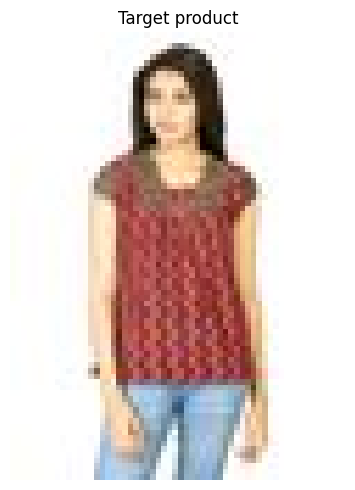

Produtos recomendados (ordenados por similaridade):


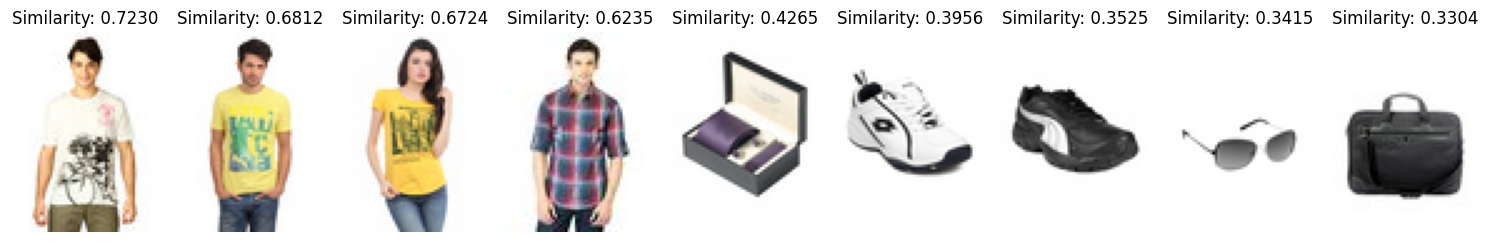

In [21]:
import os
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics.pairwise import cosine_similarity
import kagglehub
import matplotlib.pyplot as plt

def load_resnet_model():
    """Carrega o modelo ResNet50 pré-treinado."""
    return ResNet50(weights='imagenet', include_top=False, pooling='avg')

def preprocess_image(image_path, target_size=(224, 224)):
    """Prepara a imagem para ser processada pelo modelo ResNet50."""
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

def extract_features(image_path, model):
    """Extrai recursos de uma imagem usando o modelo fornecido."""
    preprocessed_image = preprocess_image(image_path)
    return model.predict(preprocessed_image, verbose=0)

def recommend_similar_products(target_img_path, product_img_paths, model):
    """Recomenda produtos semelhantes com base na similaridade de recursos."""
    # Extrair recursos da imagem alvo
    target_features = extract_features(target_img_path, model)

    # Extrair recursos das imagens dos produtos
    recommendations = []
    for product_path in product_img_paths:
        product_features = extract_features(product_path, model)
        similarity = cosine_similarity(target_features, product_features)[0][0]
        recommendations.append((product_path, similarity))

    # Ordenar por similaridade em ordem decrescente
    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations

def get_image_filenames(directory, limit=None):
    """Obtém os caminhos das imagens em um diretório."""
    filenames = []
    for file in os.listdir(directory):
        if file.endswith(('.jpg', '.jpeg', '.png')):
            filenames.append(os.path.join(directory, file))
            if limit and len(filenames) >= limit:
                break
    return filenames

def display_images(recommendations):
    """Exibe imagens e suas similaridades."""
    plt.figure(figsize=(15, 5))
    for i, (img_path, similarity) in enumerate(recommendations):
        img = load_img(img_path)
        plt.subplot(1, len(recommendations), i + 1)
        plt.imshow(img)
        plt.title(f"Similarity: {similarity:.4f}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    # Baixar dataset Fashion Product Images Small do Kaggle
    print("Baixando dataset do Kaggle...")
    dataset_path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-small")
    print(f"Dataset baixado em: {dataset_path}")

    # Diretório das imagens
    images_dir = os.path.join(dataset_path, "images")
    if not os.path.exists(images_dir):
        print(f"Erro: Diretório de imagens '{images_dir}' não encontrado.")
        return

    # Selecionar imagens do dataset
    all_images = get_image_filenames(images_dir, limit=10)  # Limite de 10 imagens
    target_img_path = all_images[0]  # Imagem alvo
    plt.figure(figsize=(15, 5))
    img = load_img(target_img_path)
    plt.imshow(img)
    plt.title(f"Target product")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    product_img_paths = all_images[1:]  # Imagens de comparação

    # Carregar o modelo InceptionV3
    model = load_resnet_model()

    # Obter recomendações de produtos semelhantes
    recommendations = recommend_similar_products(target_img_path, product_img_paths, model)

    # Exibir resultados
    print("Produtos recomendados (ordenados por similaridade):")
    display_images(recommendations)

if __name__ == "__main__":
    main()
